# **Trabajo Práctico Número 1**

*Alumnos: Guido Pauletti y Maria Agustina Burgos Pesqueira.*

Para los ejercicios serán necesarias las librerias **numpy**, **scipy** y **matplotlib**, por lo tanto las importamos.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

\
$\textbf{Ejercicio 1}$

Dada una matriz A $\in \mathbb R^{n \times n}$, retorna las dos matrices L y U de la descomposiciónn A = LU sin pivoteo. 
Si A tiene algún 0 en la diagonal, imprime un mensaje de error y devuelve las matrices In y A.

In [2]:
def descompLU(A):
    A = A.astype(np.float64)
    
    n = A.shape[0] #n=dimensión de A.
    
    #Si a11 es 0:
    if A[0][0] == 0:
        print('Error: Hay al menos un cero en la diagonal')
        identidad = np.eye(n)
        return (identidad, A)
    
    #Si la matriz es de 1x1, L=(1) y U=(a11).
    if n == 1:
        L = 1
        U = A[0,0]
        return (L, U)
    
    U = np.zeros_like(A) #Creamos U una matriz de 0s con la dimensión de A.
    U[0,:] = A[0,:]  #Primer fila de U es igual a primer fila de A.

    L = np.eye(n) #Creamos L como la identidad nxn.
    L[1:, 0] = A[1:,0] / U[0,0]
    
    #Generamos una matriz para aplicar recursión de la siguiente manera:
        #A la matriz A le sacamos la primera fila y columna y le restamos la primera columna de la matriz L (sin el primer elemento) por la primera fila de la matriz U (sin el primer elemento).
    matriz_recursiva = A[1:,1:] - L[1:, 0].reshape(n-1,1)@U[0,1:].reshape(1,n-1)

    L_re, U_re = descompLU(matriz_recursiva) #Generamos el resto de los valores de L y U de forma recursiva.
    L[1:,1:] = L_re 
    U[1:,1:] = U_re 
    
    return (L,U)

\
$\textbf{Ejercicio 3}$

Dada una matriz A cuadrada de tamaño $n \times n$ y un vector b de tamaño n, devuelve la solución x del sistema Ax = b calculando primero
la descomposición LU y resolviendo luego los sistemas Ly = b y Ux = y.

In [3]:
def resolverLU (A,b):
    #Obtenemos L y U de la funcion anterior.
    L = descompLU(A)[0]
    U = descompLU(A)[1]
    #Resolvemos Ly=b.
    y = sp.linalg.solve_triangular(L,b, lower=True)
    #Resolvemos Ux=y.
    x = sp.linalg.solve_triangular(U,y, lower=False)
    return(x)

\
$\textbf{Ejercicio 4}$

Probamos la función resolverLU del ejercicio 3 tomando una matriz A $\in \mathbb R^{10 \times 10}$ de
números aleatorios en [−1, 1) y un vector b $\in \mathbb R^{10}$ de números aleatorios en [−1, 1). $\\$
Después, calculamos el error relativo en norma 2 e = $\frac{∥A\bar{x}−b∥_2}{∥b∥_2}$ para $\bar{x}$ la solución calculada.

In [4]:
#Dado un número natural n, devuelve una matriz A de dimensión nxn y un vector v de dimnesión n, ambos con valores en [-1,1).
def generaRandom(n):
        #matriz de tamaño nxn de números aleatorios en [0,1).
        A_positiva = np.random.rand(n,n)
        #matriz de tamaño nxn de números aleatorios en [-1,0).
        A_negativa = np.random.rand(n,n) - np.ones((n,n))
        #matriz de tamaño nxn de números aleatorios en [-1,1).
        A = A_positiva + A_negativa
        #vector de tamaño n de números aleatorios en [0,1).
        v_positiva = np.random.rand(n)
        #vector de tamaño n de números aleatorios en [-1,0).
        v_negativa = np.random.rand(n) - np.ones(n)
        #vector de tamaño n de números aleatorios en [-1,1).
        v = v_positiva + v_negativa
        
        return(A,v)   

In [5]:
#Generamos A y b.
A = generaRandom(10)[0]
b = generaRandom(10)[1]

In [6]:
x = resolverLU(A,b)

In [7]:
#Dados dos vectores a y b, calcula el error relativo en norma 2.
def errorRelativo (a,b):
    e = np.linalg.norm(a-b, ord=2)/np.linalg.norm(b, ord=2)
    return(e)

In [8]:
errorRelativo(A@x,b)

6.3510584891588335e-15

\
$\textbf{Ejercicio 5}$

Dada una matriz A de tamaño $n \times n$ inversible, calcula la inversa de A.


In [9]:
def inversa(A):
    #Calculamos la descomposición LU.
    L = descompLU(A)[0]
    U = descompLU(A)[1]
    
    I= np.eye(len(A)) #Matriz identidad del tamaño de A.
    
    Ainversa = np.zeros((len(A),len(A[0]))) #Creamos una matriz Ainversa de 0s del mismo tamaño que A.
    
    #Cada fila de Ainversa es igual a Aei.
    i=0
    while i < len(I):
        y = sp.linalg.solve_triangular(L,I[i], lower=True) #Resolvemos Ly=ei.
        x = sp.linalg.solve_triangular(U,y, lower=False) #Resolvemos Ux=y.
        Ainversa[i] = x
        i = i+1
        
    #Devuelve la transpuesta de Ainversa (para que Aei sea cada columna).
    return(np.transpose(Ainversa))

\
$\textbf{Ejercicio 6}$

Probamos la función inversa del ejercicio 5 tomando una matriz A $\in \mathbb R^{10 \times 10}$ de
números aleatorios en [−1, 1). $\\$
Después, calculamos $A^{−1}A$ (siendo $A^{−1}$ la matriz retornada por la función inversa) y el error en norma Frobenius: $∥A^{−1}A − I∥_F$.

In [10]:
#Matriz de de tamaño 10x10 de números aleatorios en [-1,1).
A = generaRandom(10)[0]

In [11]:
#Calculamos la multiplicación de la inversa de A y A.
AiA = inversa(A)@A
#Matriz identidad de tamaño 10.
I = np.eye(10)

In [12]:
errorFrobenius = np.linalg.norm(AiA-I,'fro')

In [13]:
errorFrobenius

1.0423060165688987e-14

\
$\textbf{Ejercicio 7}$

En la parte 1 del ejercicio hicimos 10 experimentos donde en cada uno tomamos una matriz random A y un vector random x de valores en [-1,1) con dimensión entre 10 y 200.

Obtuvimos b a partir de Ax=b (a). 
                                                                                                                                      
Luego, calculamos primero x1 con la función del ejercicio 3 y segundo el logaritmo natural del error relativo $\frac{∥Ax_1−b∥_2}{∥b∥_2}$ (b y c).
                                                                                                                                      
Despúes, calculamos primero x2 con la función del ejercicio 5 y segundo el logratimo natural del error relativo $\frac{∥Ax_2−b∥_2}{∥b∥_2}$ (d y e).
                                                                                                                                      
En la parte 2, grabamos en un vector v1 los errores cometidos por el primer método, asignando en la
coordenada i del vector la suma de los logaritmos de los errores obtenidos para matrices de $i \times i$.
                                                                                                                                      
En la parte 3, grabamos en un vector v2 los errores cometidos por el segundo método, asignando en la
coordenada i del vector la suma de los logaritmos de los errores obtenidos para matrices de $i \times i$.
                                                                                                                                      
Finalmente, graficamos los errores cometidos por ambos métodos en un solo gráfico. 

In [14]:
#Creamos dos listas vacias, 
#en la primera vamos a guardar los errores relativos del primero método
todose1 = []
#y en la segunda los errores relativos del segundo método.
todose2 = []

for n in range (10,201):
    #Empezamos los 10 experimentos.
    #1) a)
    for i in range(1,11):
        #Generamos A y x.
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        
        #Calculamos b.
        b = A@x
        
        #b) 
        x1=resolverLU(A,b)

        #c)
        e1=np.log(errorRelativo(A@x1,b))

        #d)
        x2=inversa(A)@b

        #e)
        e2=np.log(errorRelativo(A@x2,b))
        
        todose1.append(e1)
        todose2.append(e2)

In [15]:
#Dado un vector error, devuelve un vector v asignando en la coordenada i del vector la suma de los logaritmos de los errores obtenidos para matrices de ixi.
def generaV (error):
    v = np.zeros(201) #Creamos la lista v con 201 0s.
    
    for n in range (0,191):
        v[10+n] = sum(error[10*n:10*(n+1)])
        
    return(v)

In [16]:
#2) Pasamos los errores al lugar correspondiente en v1.
v1 = generaV(todose1)
#3) Pasamos los errores al lugar correspondiente en v2.
v2 = generaV(todose2)

In [17]:
#Dado un string e y dos vectores v1 y v2, grafica los errores relativos de Ax-b vs dimensión para los métodos LU e inversa si e = "A".
#Sino, grafica los errores relativos de xi-x vs dimnensión para ambos métodos.
def graficar(e,v1,v2):
    n = np.arange(10, len(v1))
    plt.plot(n,v1[10:], label= "Resolver(LU)x=b")
    plt.plot(n,v2[10:], label= "x= Inversa(A)*b")
    if e == "A" :
        plt.title("Errores relativos ||Ax-b||/||b||")
    else:
        plt.title("Errores relativos ||xi-x||/||x||")   
    plt.xlabel("dimensión de A")
    plt.ylabel("ln de los errores relativos")
    plt.legend()
    plt.show()   

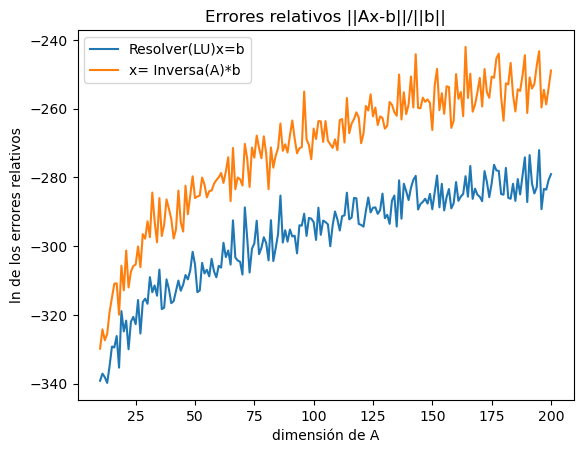

In [18]:
#Graficamos.
graficar("A",v1,v2)

**Conclusiones:**

Teniendo en cuenta que el logaritmo natural de un número es mas negativo cuanto mas ceracano a 0 sea este, y mirando el gráfico, podemos ver que la suma de los errores relativos con el método LU es menor que con el método de la inversa.

Asimismo, obervamos que si bien esta tendencia se mantiene a lo largo de todo el gráfico, el error para ambos métodos y la diferencia entre los errores va aumentando junto con el tamaño de la dimension.

Esto último se debe a que el error del método de la inversa aumenta más con el tamaño de la dimensión que el método LU.

Finalmente, notamos que si bien se puede ver una tendencia, los métodos no son muy precisos (hay "saltos" a lo largo de todo el gráfico).

\
$\textbf{Ejercicio 8}$

Repetimos todo el experimento del Ejercicio 7 pero midiendo los errores relativos entre las soluciones halladas y la solución original: $\frac{∥x_i−x∥_2}{∥x∥_2}$.


In [19]:
todose1 = []
todose2 = []
for n in range (10,201):
    v1 = np.zeros(201)
    v2 = np.zeros(201)
    for i in range(1,11):
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        
        b = A@x
        
        x1=resolverLU(A,b)
        
        #Error relativo para x1.
        e1=np.log(errorRelativo(x1,x))
        
        x2=inversa(A)@b
        
        #Error relativo para x2.
        e2=np.log(errorRelativo(x2,x))
        
        todose1.append(e1)
        todose2.append(e2)

In [20]:
v1 = generaV(todose1)
v2 = generaV(todose2)

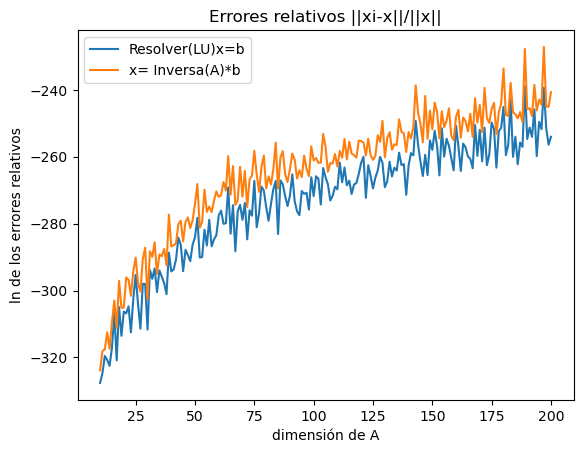

In [21]:
graficar("x",v1,v2)

**Conclusiones:**

Comparando este gráfico con el del ejercicio 7, podemos ver tres tendencias que se mantienen:

        -Los errores van aumentando junto con el tamaño de la dimensión.

        -El método LU tiene menos error que el de la inversa.
        
        -Los métodos no son muy precisos (hay "saltos" a lo largo de todo el gráfico y 
        pareciera que el método LU perdió precisión).

Sin embargo, la magnitud de ambos errores incrementó y la diferencia entre ellos es mucho más chica: Si comparamos los valores del eje "y" podemos concluir que el método LU fue el que más aumentó su error.

\
$\textbf{Ejercicio 9}$

Repetimos los experimentos del Ejercicio 7 y 8 pero utilizando los comandos np.linalg.solve y np.linalg.inv de numpy en lugar de las funciones resolverLU e inversa.

In [22]:
#Ejercicio 7 usando np.linag.solve. y np.linalg.inv
todose1 = []
todose2 = []
for n in range (10,201):
    v1 = np.zeros(201)
    v2 = np.zeros(201)
    for i in range(0,10):
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        
        b = A@x
        
        x1=np.linalg.solve(A,b)

        e1=np.log(errorRelativo(A@x1,b))

        x2=np.linalg.inv(A)@b

        e2=np.log(errorRelativo(A@x2,b))
        
        todose1.append(e1)
        todose2.append(e2)

In [23]:
v1 = generaV(todose1)
v2 = generaV(todose2)

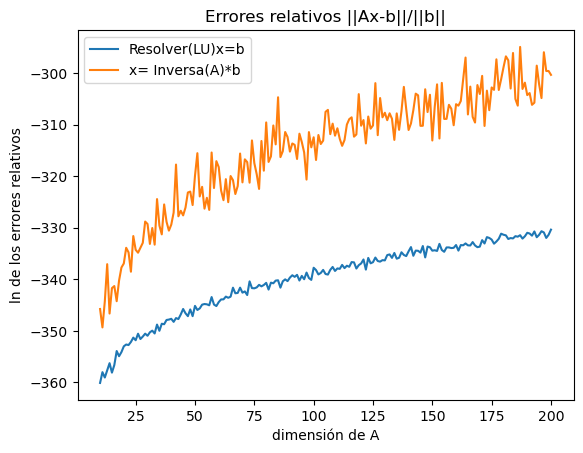

In [24]:
graficar("A",v1,v2)

**Conclusiones:**

Si comparamos con el gráfico del ejercicio 7, podemos notar que ambas tendencias se mantienen (menor error el método de LU y ambos errores aumentan con la dimensión) pero en este gráfico hay menos error en ambos métodos y la distancia entre los errores es mayor.

Es decir, el método de la inversa tiene un error más considerable que el de LU usando np.linalg.inv y np.linag.solve respectivamente, pero estos tienen menos error que usar las funciones resolverLU e inversa (se puede ver comparando los ejes "y" de los dos gráficos).

Asimismo, el error del método de la inversa aumenta más con el tamaño de la dimensión que el método LU que si bien aumenta, lo hace de a poco.

Finalmente, mientras el método de la inversa sigue con el mismo grado de precisión, el método LU es mucho más preciso (los saltos disminuyeron significativamente en el gráfico).

In [25]:
#Ejercicio 8 usando np.linag.solve. y np.linalg.inv
todose1 = []
todose2 = []
for n in range (10,201):
    v1 = np.zeros(201)
    v2 = np.zeros(201)
    for i in range(1,11):
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        b = A@x
        
        x1=np.linalg.solve(A,b)

        e1=np.log(errorRelativo(x1,x))
        
        x2=np.linalg.inv(A)@b

        e2=np.log(errorRelativo(x2,x))
        
        todose1.append(e1)
        todose2.append(e2)

In [26]:
v1 = generaV(todose1)
v2 = generaV(todose2)

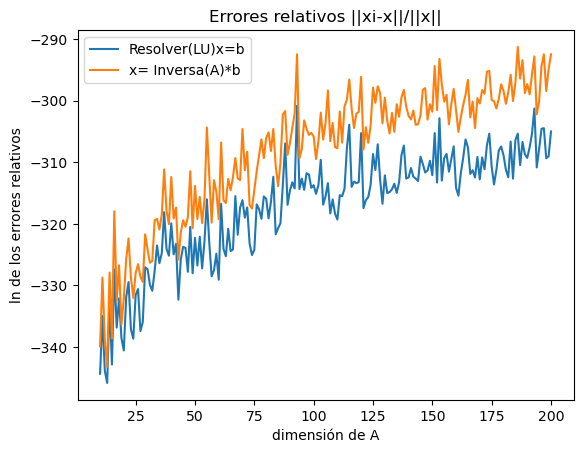

In [27]:
graficar("x",v1,v2)

**Conclusiones:**

Comparando con el gráfico del ejercicio 8, podemos notar que las tres tendencias se mantienen (menor error el método de LU, ambos errores aumentan con la dimensión y falta de precisión).

Sin embargo, en este gráfico hay menos error en ambos métodos y la distancia entre los errores a medida que aumenta la dimensión es mayor.

Esto último se debe a que el error del método de la inversa aumenta más con el tamaño de la dimensión que el error del método LU.

Si comparamos con el primer gráfico de este ejercicio, podemos ver un comportamiento análogo al que observamos al comparar los graficos del ejercicio 8 y 7.

\
$\textbf{Ejercicio 10}$

Repetimos el experimento del Ejercicio 7 para n = 2, . . . , 20 pero utilizando únicamente una matriz A $\in \mathbb R^{n \times n}$ definida como aij = $ \frac{1}{1+i+j}$.

Luego, calculamos el número de condición de A.

In [31]:
todose1 = []
todose2 = []
#Creamos una lista vacia donde vamos a guardar los números de condición de A.
condicion = []
#Creamos una lista vacia donde vamos a guardar los ln de los números de condición de A.
logCondicion = []

for n in range (2,21):
    for i in range(1,11):
        
        #Creamos A.
        A = np.zeros((n,n))
        for i in range (0,n):
            for j in range (0,n):
                A[i][j] = A[j][i] = 1/(1+i+j)
                
        x = generaRandom(n)[1]
        
        b = A@x
        
        x1=resolverLU(A,b)

        e1=np.log(errorRelativo(A@x1,b))

        x2=inversa(A)@b

        e2=np.log(errorRelativo(A@x2,b))
        
        todose1.append(e1)
        todose2.append(e2)
    
   
    # Calculamos y guardamos el número de condición de A y su ln.
    condA = np.linalg.cond(A, p=2)
    condicion.append(condA) 
    
    logCondA = np.log(condA)
    logCondicion.append(logCondA)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6512\3652425078.py:23: RuntimeWarning: divide by zero encountered in log
  e1=np.log(errorRelativo(A@x1,b))
C:\Users\Acer\AppData\Local\Temp\ipykernel_6512\3652425078.py:27: RuntimeWarning: divide by zero encountered in log
  e2=np.log(errorRelativo(A@x2,b))


In [32]:
#Cambiamos los valores para n = 2,...,20.
v1 = np.zeros(21) 
v2 = np.zeros(21)
for n in range (0,19):
        v1[2+n] = sum(todose1[10*n:10*(n+1)])
        v2[2+n] = sum(todose2[10*n:10*(n+1)])

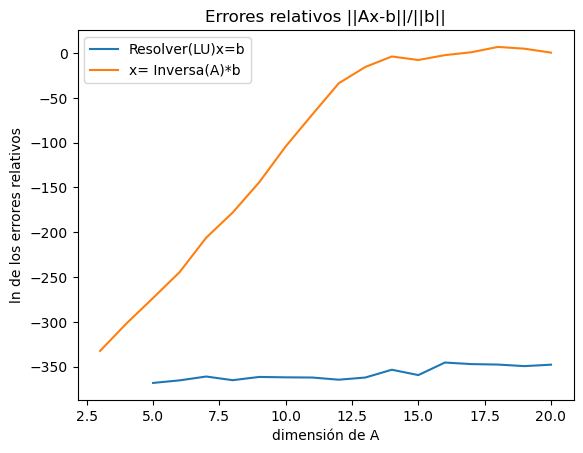

In [33]:
#Graficamos.
n = np.arange(2, len(v1))
plt.plot(n,v1[2:], label= "Resolver(LU)x=b")
plt.plot(n,v2[2:], label= "x= Inversa(A)*b")
plt.title("Errores relativos ||Ax-b||/||b||")
plt.xlabel("dimensión de A")
plt.ylabel("ln de los errores relativos")
plt.legend()
plt.show()

**Conclusiones:**

Primero que nada, cuando corrimos la función apareció una advertencia que nos indicó que para algunos valores obtuvimos un ln(0), esto sucedió solamente con las dimensiones más chicas.

Para el método de la inversa sucedió para algunas matrices de 2x2, mientras que para el método LU sucedió para matrices de hasta 5x5.

Podemos suponer que al ser matrices de poca dimensión, con números no tan chicos (por como definimos A), cuando aplicamos los métodos para calcular x1 y x2, la función no tuvo error para la precisión de la máquina y por lo tanto, a la hora de calcular Axi-b, dio 0.

Este razonamiento coincide con el hecho de que podemos ver en el gráfico que el método LU tiene menos error que el de la inversa (y por eso dio 0 para más dimensiones).

Ahora si, analizando el gáfico podemos observar que la diferencia de errores entre ambos métodos es muy grande; si bien ambos aumentan con la dimensión, el método de la inversa lo hace de una manera mucho más abrupta.

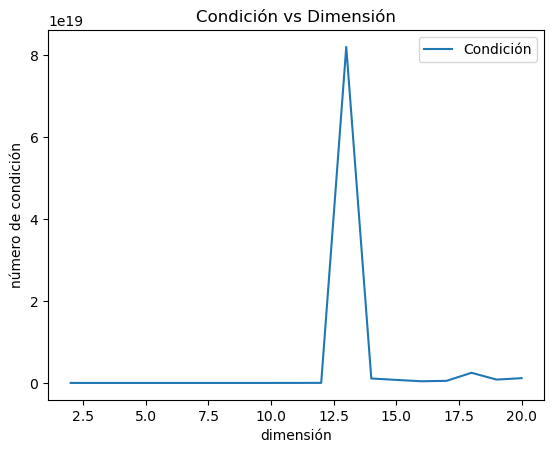

In [34]:
#Veamos el comportamiento del número de condición.
n = np.arange(2, len(v1))
plt.plot(n,condicion, label= "Condición")
plt.title("Condición vs Dimensión")
plt.xlabel("dimensión")
plt.ylabel("número de condición")
plt.legend()
plt.show()

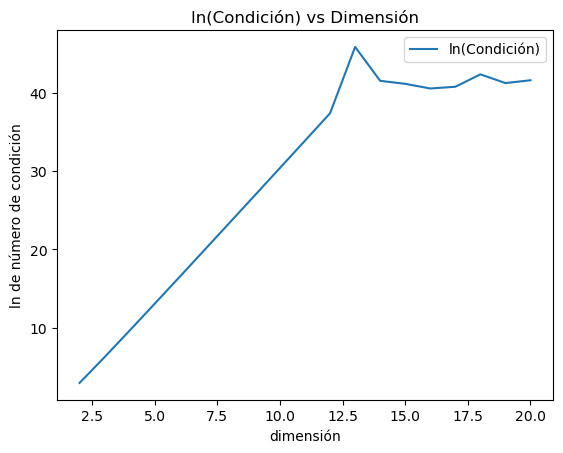

In [35]:
n = np.arange(2, len(v1))
plt.plot(n,logCondicion,label= "ln(Condición)")
plt.title("ln(Condición) vs Dimensión")
plt.xlabel("dimensión")
plt.ylabel("ln de número de condición")
plt.legend()
plt.show()

**Conclusiones:**

El número de condición nos da una medida de cuán mala es una matriz en cuanto a la propagación de los errores relativos. Si este número es grande se dice que la matriz está “mal condicionada”.

Cuando los problemas están bien condicionados tenemos esperanza de resolverlos con precisión siempre que nuestro algoritmo no incremente desproporcionadamente los errores inherentes a los datos.

En ambos gráficos podemos ver que el número de condición crece junto con la dimensión, con un pico en las matrices de 13x13.

Es decir, si bien el número de condición va aumentando, a partir de las matrices de 12x12 el número es muy grande, y por lo tanto hay mucha propagación de errores, con lo cual no vamos a poder resolver ningún problema con precisión, más alla del algoritmo en cuestión.

\
$\textbf{CONCLUSIONES FINALES.}$

Conclusiones sobre la manera de realizar el TP:

        -Es muy importante optimizar el tiempo de ejecución de una función: En un principio habiamos planteado el ejercicio 
        1 de otra manera, que incluia dos ciclos. A la hora de hacer el ejercicio 7 nos encontramos con que esta función
        tardaba mucho (más de 30 minutos) en devolver lo pedido. Entonces, si bien la funcion era correcta (la habiamos 
        probado y daba bien), no nos servia para realizar el TP por el tiempo que tardaba y tuvimos que reescribirla.
        
        -Es muy útil hacer funciones generales: A partir del ejercicio 7 tuvimos que repetir muchas partes del código, 
        entonces decidimos hacer funciones que realizaran de manera general lo que necesitabamos para después aplicarlo en 
        cada ejercicio que lo necesitara.
        
Conclusiones sobre los ejercicios del tp:

        -En los ejercicios 4 y 6 probamos las funciones implementadas en los ejercicios 1,3 y 5 y vimos que los errores eran 
        chicos.
        
        -A partir del ejercicio 7 hasta el 9 pudimos chequear bien la propagación de errores de nuestras funciones:
        
            Vimos que en todos los casos (con nuestras funciones y las de la libera numpy) el método LU tuvo menos errores 
            que el método de la inversa, es decir, la máquina tiene menos error cuando descompone una matriz A en L y U, 
            que cuando calcula su inversa. Entonces, si tenemos A y x, lo mejor para calcular b (Ax=b) es el método LU y 
            en particular, usar np.linalg.solve que, como vimos, es el más preciso y el que menos error tiene.
            Esto se mantiene para calcular x, aunque con un poco más de error y menos precisión, pero sigue siendo la mejor
            opción.
            
            Más alla de esto, siempre hay que tener en cuenta que los errores aumentan con la dimensión, por lo que, a la 
            hora de usar una matriz de dimensiones grandes hay que tener en cuenta que el error es cada vez más 
            significativo.
            
        -Finalmente, en el ejercicio 10 vimos que los métodos funcionan muy bien para matrices de dimensiones chicas, 
        aunque sigue siendo preferible el método LU (vimos como con el método de la inversa el error crecia muchisimo a 
        medida que aumentaba la dimensión). 
        Además, comprobamos que estos errores no eran un problema especifico de las implementaciones sino de las matrices, 
        que tenían un número de condición cada vez más grande.